In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
# Reading the Excel files
patient_data = pd.read_excel("Patient Data.xlsx")
provider_data = pd.read_excel("Provider Data Joined.xlsx")

# Display the first few rows of each dataframe to understand the structure and contents
display(patient_data.head())
display(provider_data.head())

,PERFORMANCE_YEAR,QRO,TIN_CCN,ENROLLMENT_TYPE,BENE_CNT,AVR_RISK_SCORE,AVR_RISK_SCORE_STANDARDIZED
0,2022,MKLO,866020,ESRD,10,1.861,2.117089
1,2022,MKLO,866020,Unknown,109,0.736,-0.495252
2,2022,MKLO,866020,Aged-Dual,344,0.876,-0.170161
3,2022,MKLO,866020,Disabled,713,0.863,-0.200348
4,2022,MKLO,866020,Aged,2868,0.940,-0.021548


,PERFORMANCE_YEAR,QRO,TIN_CCN,TOTAL_SPEND,AGED_TOTAL_SPEND,DISABLED_TOTAL_SPEND,ESRD_TOTAL_ESRD,AGED_DUAL_TOTAL_SPEND,SUM_IP_SPEND,SUM_FAC_OP_SPEND,...,SUM_DME_SPEND,ED_VISIT_RATE,ED_RETURN_72HRS,IP_ADMIT_RATE,READMIT_30DAY_RATE,AWV_RATE,SUM_PCP_VISITS,CNT_PCP_VISITS,SUM_SPEC_VISITS,CNT_SPEC_VISITS
0,2019,MTIP,122406,18332.78,1755.58,16577.20,0.00,0.00,0.00,11329.40,...,0.00,166.7,1.000,278.515108,0.137765,0.000,988.59,10,460.16,12
1,2019,MTIP,679036,122.30,122.30,0.00,0.00,0.00,0.00,122.30,...,0.00,0.0,0.000,0.000000,0.000000,0.000,122.30,1,0.00,0
2,2019,MTIP,344888,8.79,0.00,0.00,8.79,0.00,0.00,8.79,...,0.00,0.0,0.000,0.000000,0.000000,0.000,8.79,1,0.00,0
3,2019,MTIP,125904,326079.83,165138.70,61145.21,99795.92,0.00,48225.71,134299.70,...,25392.39,1062.5,0.735,218.800000,0.137765,0.438,26994.97,260,9199.88,153
4,2019,MTIP,183834,51693176.93,36549230.25,7356027.20,3118860.85,4668087.62,19192504.70,16020228.69,...,1349982.92,797.1,0.758,307.500000,0.139000,0.441,1464784.77,23075,1050828.72,17304


Let's do a simple overview of the network composition trends.

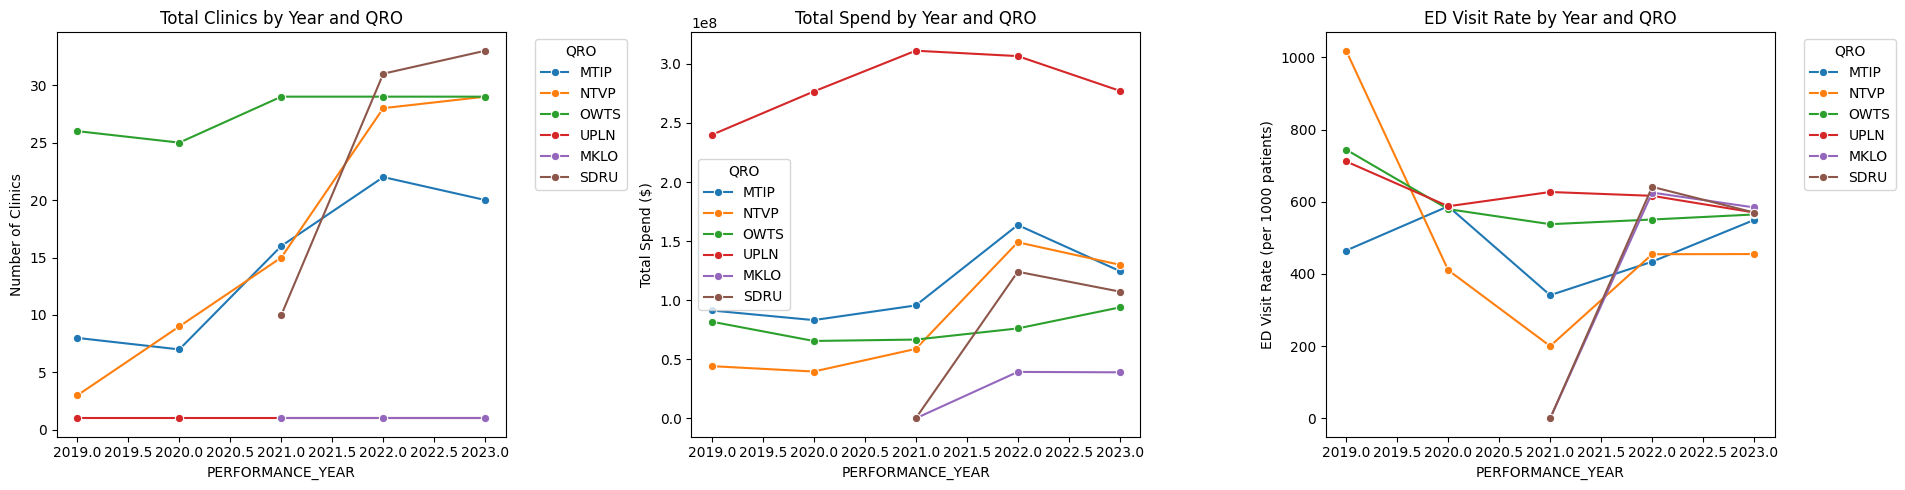

,total_clinics,total_spend,inpatient_spend,facility_outpatient_spend,physician_spend,postacute_spend,hospice_spend,dme_spend,ed_visit_rate,ed_return_72hrs,ip_admit_rate,readmit_30day_rate,awv_rate
total_clinics,1.000000,-0.251056,-0.281772,-0.298526,-0.045787,-0.156937,-0.224459,-0.325806,-0.005903,-0.079962,0.194905,0.110703,0.006787
total_spend,-0.251056,1.000000,0.992278,0.987024,0.970134,0.961905,0.950949,0.990113,0.338960,0.420045,0.455150,0.629446,0.491067
inpatient_spend,-0.281772,0.992278,1.000000,0.965623,0.951241,0.968184,0.938249,0.987091,0.342800,0.447937,0.483247,0.646926,0.506788
facility_outpatient_spend,-0.298526,0.987024,0.965623,1.000000,0.943379,0.915081,0.930635,0.980181,0.291636,0.366463,0.355958,0.547403,0.404357
physician_spend,-0.045787,0.970134,0.951241,0.943379,1.000000,0.953268,0.933098,0.944639,0.383415,0.415795,0.533279,0.696623,0.570609
postacute_spend,-0.156937,0.961905,0.968184,0.915081,0.953268,1.000000,0.952825,0.934178,0.424889,0.515579,0.604639,0.725625,0.603370
hospice_spend,-0.224459,0.950949,0.938249,0.930635,0.933098,0.952825,1.000000,0.926732,0.404119,0.444581,0.490912,0.621031,0.488610
dme_spend,-0.325806,0.990113,0.987091,0.980181,0.944639,0.934178,0.926732,1.000000,0.288779,0.360760,0.393130,0.580576,0.464777
ed_visit_rate,-0.005903,0.338960,0.342800,0.291636,0.383415,0.424889,0.404119,0.288779,1.000000,0.843460,0.818175,0.784690,0.624308
ed_return_72hrs,-0.079962,0.420045,0.447937,0.366463,0.415795,0.515579,0.444581,0.360760,0.843460,1.000000,0.759128,0.780670,0.530065


In [3]:
# Aggregating data by 'PERFORMANCE_YEAR' and 'QRO' for an overview of network composition
network_composition_overview = provider_data.groupby(['PERFORMANCE_YEAR', 'QRO']).agg(
    total_clinics=('TIN_CCN', 'nunique'),
    total_spend=('TOTAL_SPEND', 'sum'),
    aged_spend=('AGED_TOTAL_SPEND', 'sum'),
    disabled_spend=('DISABLED_TOTAL_SPEND', 'sum'),
    esrd_spend=('ESRD_TOTAL_ESRD', 'sum'),
    aged_dual_spend=('AGED_DUAL_TOTAL_SPEND', 'sum'),
    inpatient_spend=('SUM_IP_SPEND', 'sum'),
    facility_outpatient_spend=('SUM_FAC_OP_SPEND', 'sum'),
    physician_spend=('SUM_PHY_SPEND', 'sum'),
    postacute_spend=('SUM_POSTACUTE_SPEND', 'sum'),
    hospice_spend=('SUM_HOSPICE_SPEND', 'sum'),
    dme_spend=('SUM_DME_SPEND', 'sum'),
    ed_visit_rate=('ED_VISIT_RATE', 'mean'),
    ed_return_72hrs=('ED_RETURN_72HRS', 'mean'),
    ip_admit_rate=('IP_ADMIT_RATE', 'mean'),
    readmit_30day_rate=('READMIT_30DAY_RATE', 'mean'),
    awv_rate=('AWV_RATE', 'mean'),
    pcp_visits_cost=('SUM_PCP_VISITS', 'sum'),
    pcp_visits_count=('CNT_PCP_VISITS', 'sum'),
    specialty_visits_cost=('SUM_SPEC_VISITS', 'sum'),
    specialty_visits_count=('CNT_SPEC_VISITS', 'sum')
).reset_index()

# Compute the correlation matrix for performance metrics
correlation_metrics = network_composition_overview[
    ['total_clinics', 'total_spend', 'inpatient_spend', 'facility_outpatient_spend', 
     'physician_spend', 'postacute_spend', 'hospice_spend', 'dme_spend', 
     'ed_visit_rate', 'ed_return_72hrs', 'ip_admit_rate', 'readmit_30day_rate', 'awv_rate']
]

correlation_matrix = correlation_metrics.corr(method='pearson')

# Visualizing the trends of network composition over time
plt.figure(figsize=(18, 5))
plt.subplot(131)
sns.lineplot(data=network_composition_overview, x='PERFORMANCE_YEAR', y='total_clinics', hue='QRO', marker='o')
plt.title('Total Clinics by Year and QRO')
plt.ylabel('Number of Clinics')
plt.legend(title='QRO', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(132)
sns.lineplot(data=network_composition_overview, x='PERFORMANCE_YEAR', y='total_spend', hue='QRO', marker='o')
plt.title('Total Spend by Year and QRO')
plt.ylabel('Total Spend ($)')

plt.subplot(133)
sns.lineplot(data=network_composition_overview, x='PERFORMANCE_YEAR', y='ed_visit_rate', hue='QRO', marker='o')
plt.title('ED Visit Rate by Year and QRO')
plt.ylabel('ED Visit Rate (per 1000 patients)')

plt.tight_layout()
plt.legend(title='QRO', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display correlation matrix and trends
plt.show()
correlation_matrix

Here are some key points from the analysis:
- There is a negative correlation between the total number of clinics and the total spend. This could imply that as the number of clinics increases, the spend per clinic may decrease.
- The total spend is strongly correlated with spend in specific categories like inpatient, outpatient, and physician services. This suggests that changes in these areas could significantly impact the total spend.
- The ED visit rate, rate of return to ED within 72 hours, inpatient admission rate, and readmission rate within 30 days show moderate to strong correlations with total spend and with each other, indicating these are key areas to explore for improving performance and reducing costs.

The visual trends provide the following insights:
- The number of clinics varies by provider organization (QRO) and year, with no clear upward or downward trend.
- Total spend varies greatly by QRO and shows some fluctuations over the years, which may correspond to changes in the network composition or external factors.
- The ED visit rate by year and QRO is relatively stable, suggesting that while there may be variation in spend and clinic numbers, emergency department utilization rates do not fluctuate as much.

For further analysis of network composition, we'll look into the following aspects:
1. How the number of clinics and the type of patients they serve (as inferred by spend per enrollment type) vary by QRO.
2. The relationship between the average risk score of patients and the total spend per clinic.


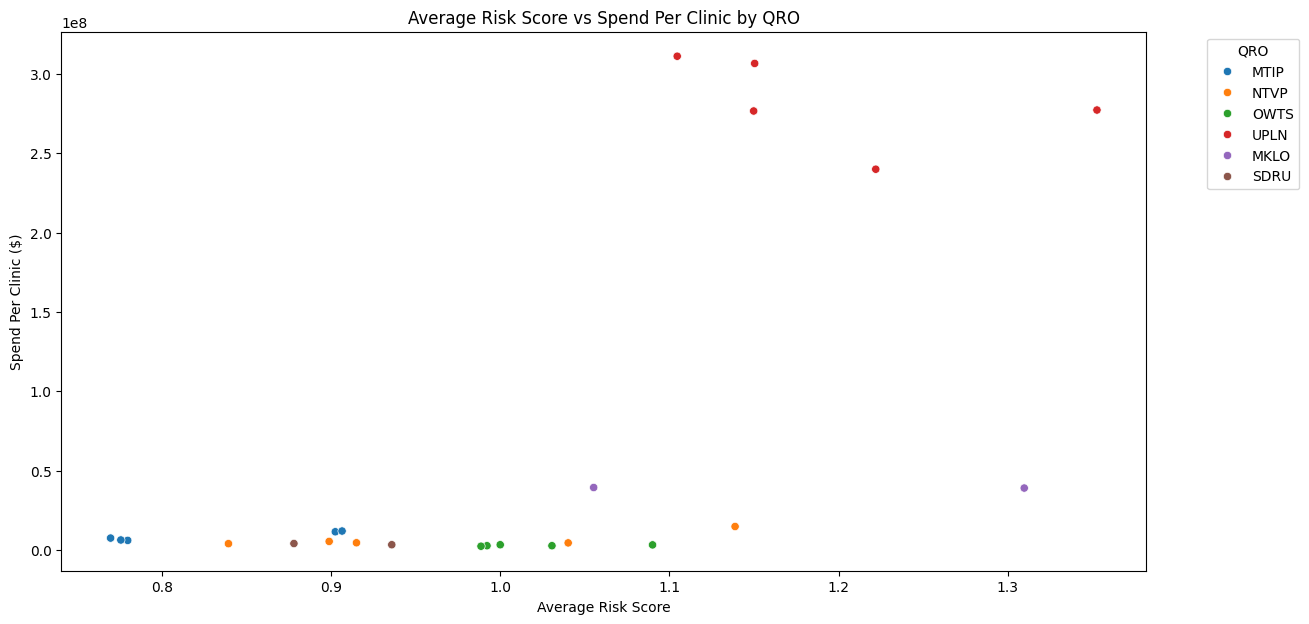

In [4]:

# Calculating the total spend per clinic by year and QRO
network_composition_overview['spend_per_clinic'] = network_composition_overview['total_spend'] / network_composition_overview['total_clinics']

# Joining this aggregated data back with the main provider data to include the average risk score which is available in the patient data

# Calculating the average risk score per clinic and joining it with the aggregated data
avg_risk_score_per_clinic = patient_data.groupby(['PERFORMANCE_YEAR', 'QRO'])['AVR_RISK_SCORE'].mean().reset_index()

# Merging the average risk score with the network composition overview data
network_composition_risk_merged = pd.merge(network_composition_overview, avg_risk_score_per_clinic, on=['PERFORMANCE_YEAR', 'QRO'], how='left')

# Visualizing the relationship between the average risk score and the total spend per clinic
plt.figure(figsize=(14, 7))

# Scatter plot of spend per clinic vs average risk score by QRO
sns.scatterplot(data=network_composition_risk_merged, x='AVR_RISK_SCORE', y='spend_per_clinic', hue='QRO')

plt.title('Average Risk Score vs Spend Per Clinic by QRO')
plt.xlabel('Average Risk Score')
plt.ylabel('Spend Per Clinic ($)')
plt.legend(title='QRO', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Additionally, let's look at the breakdown of spend by enrollment type for each QRO

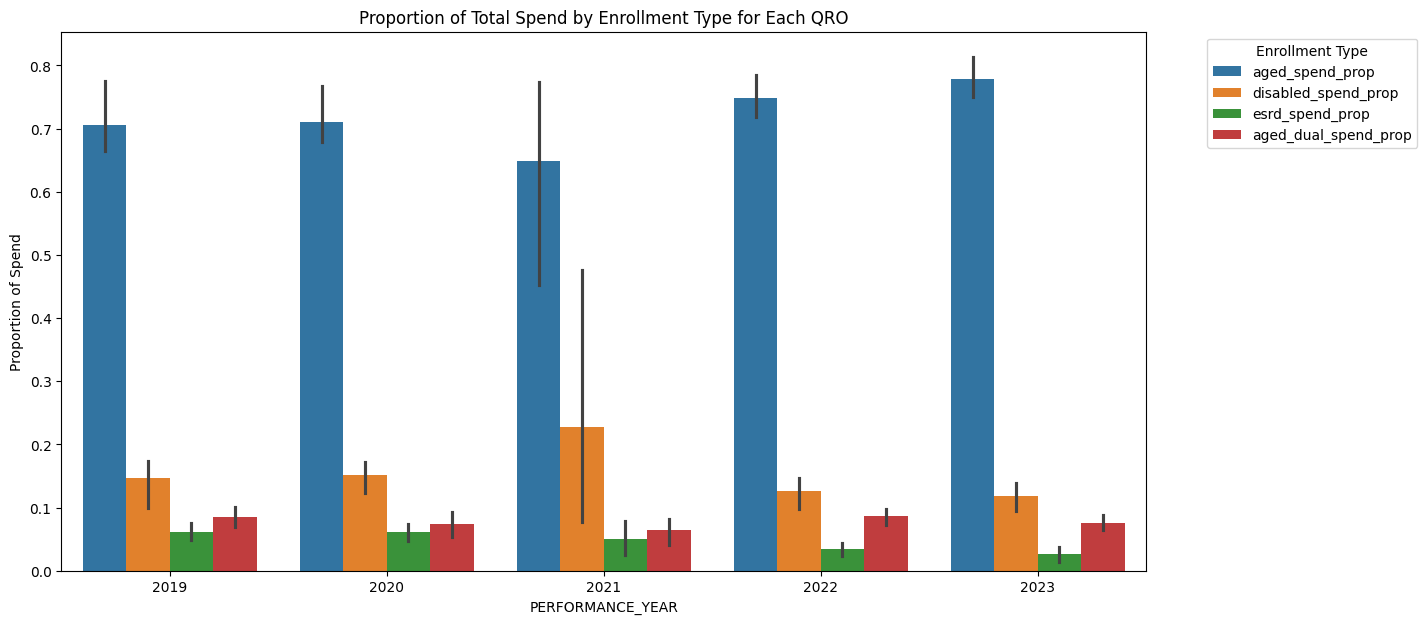

In [5]:

# We'll calculate the proportions of each spend type relative to the total spend
enrollment_spend_types = ['aged_spend', 'disabled_spend', 'esrd_spend', 'aged_dual_spend']
for spend_type in enrollment_spend_types:
    network_composition_risk_merged[spend_type + '_prop'] = network_composition_risk_merged[spend_type] / network_composition_risk_merged['total_spend']

# Now, let's plot these proportions to see the spend distribution by enrollment type for each QRO
enrollment_spend_props = network_composition_risk_merged[['PERFORMANCE_YEAR', 'QRO'] + [x + '_prop' for x in enrollment_spend_types]]

# Melting the DataFrame for easier plotting
enrollment_spend_props_melted = enrollment_spend_props.melt(id_vars=['PERFORMANCE_YEAR', 'QRO'], var_name='Enrollment Type', value_name='Proportion of Spend')

plt.figure(figsize=(14, 7))
sns.barplot(data=enrollment_spend_props_melted, x='PERFORMANCE_YEAR', y='Proportion of Spend', hue='Enrollment Type')
plt.title('Proportion of Total Spend by Enrollment Type for Each QRO')
plt.legend(title='Enrollment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Output the merged data for further inspection if needed

In [6]:
network_composition_risk_merged_output = network_composition_risk_merged[['PERFORMANCE_YEAR', 'QRO', 'AVR_RISK_SCORE', 'spend_per_clinic'] + [x + '_prop' for x in enrollment_spend_types]]
network_composition_risk_merged_output.head()

,PERFORMANCE_YEAR,QRO,AVR_RISK_SCORE,spend_per_clinic,aged_spend_prop,disabled_spend_prop,esrd_spend_prop,aged_dual_spend_prop
0,2019,MTIP,0.902429,1.141003e+07,0.660565,0.166254,0.071555,0.101616
1,2019,NTVP,1.138818,1.472559e+07,0.674161,0.172787,0.052662,0.100390
2,2019,OWTS,1.090012,3.146154e+06,0.810190,0.075585,0.045378,0.068847
3,2019,UPLN,1.222000,2.399395e+08,0.679324,0.173462,0.077301,0.069913
4,2020,MTIP,0.906429,1.187825e+07,0.679414,0.158109,0.066265,0.094342


Average Risk Score vs Spend Per Clinic:

- There does not appear to be a simple linear relationship between the average risk score and the spend per clinic. This suggests that patient complexity, as measured by the risk score, does not predictably affect the spend per clinic across QROs. Different QROs might have different management efficiencies or patient care models.

Proportion of Total Spend by Enrollment Type:

- The distribution of spend by enrollment type varies by QRO and year. For example, a significant proportion of the spend is on aged beneficiaries, with variations in the proportion spent on disabled, ESRD, and aged dual beneficiaries.
This variability in spend distribution could reflect the different clinical focuses or patient populations of each QRO.

For clinic level analysis, we will consider the following:
1. Spend per clinic within each QRO.
2. Performance metrics such as ED visit rate, readmission rate, etc., at the clinic level.

Since we need clinic level details, we'll work with the original 'new_provider_data' DataFrame.


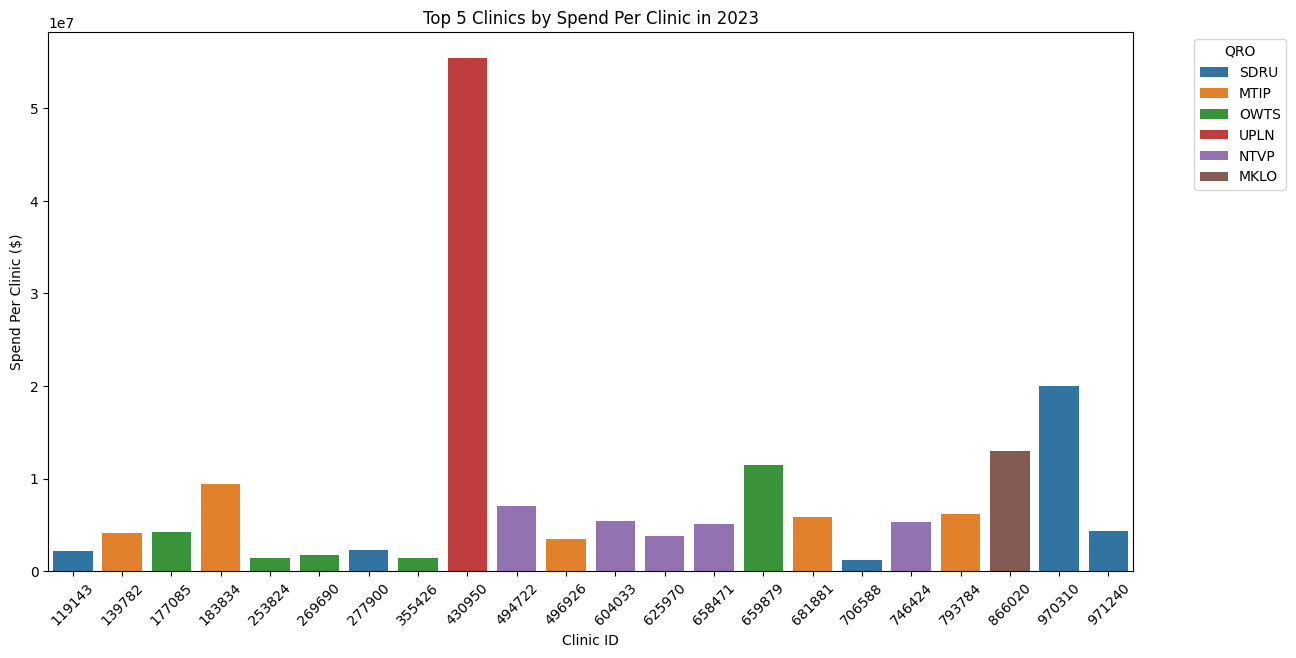

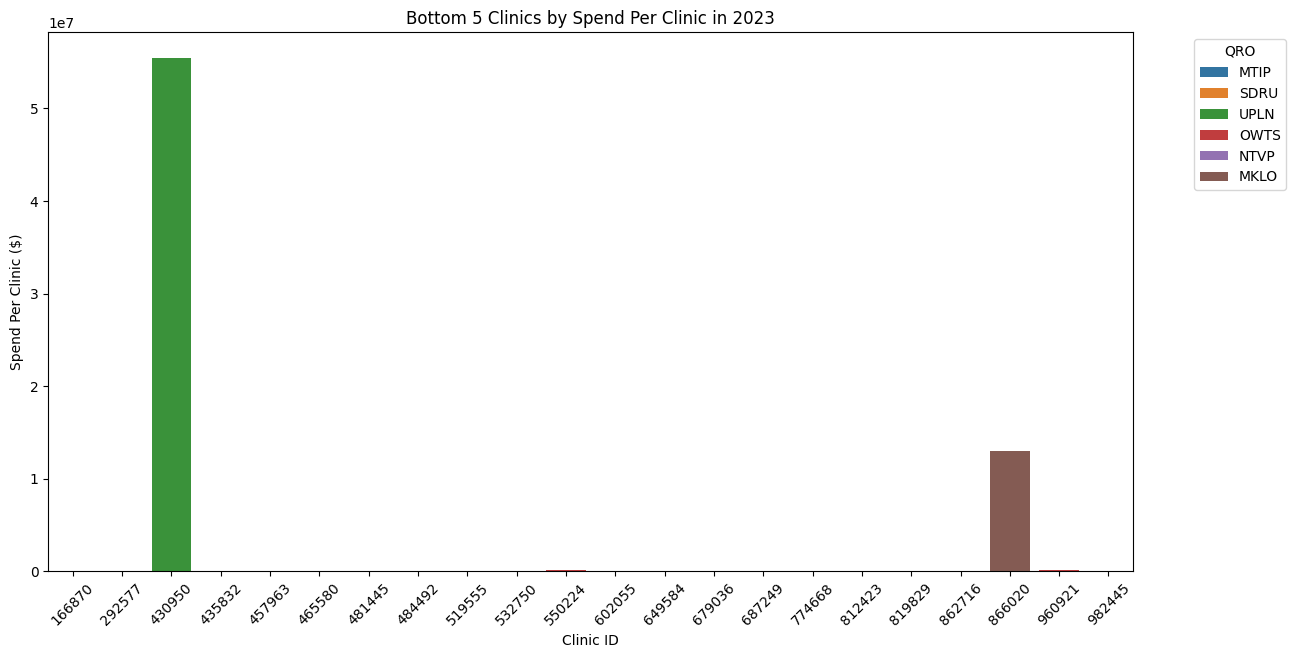

,PERFORMANCE_YEAR,QRO,TIN_CCN,spend_per_clinic
283,2023,MKLO,866020,1.298886e+07
277,2023,MTIP,183834,9.462505e+06
279,2023,MTIP,793784,6.146683e+06
281,2023,MTIP,681881,5.840820e+06
282,2023,MTIP,139782,4.154621e+06
278,2023,MTIP,496926,3.511309e+06
311,2023,NTVP,494722,7.037284e+06
305,2023,NTVP,604033,5.393793e+06
310,2023,NTVP,746424,5.304557e+06
303,2023,NTVP,658471,5.118662e+06


,PERFORMANCE_YEAR,QRO,TIN_CCN,spend_per_clinic
283,2023,MKLO,866020,1.298886e+07
269,2023,MTIP,166870,1.669275e+02
267,2023,MTIP,649584,2.004133e+02
265,2023,MTIP,679036,2.286360e+02
276,2023,MTIP,457963,4.795600e+02
263,2023,MTIP,532750,7.180550e+02
287,2023,NTVP,519555,8.435000e+02
301,2023,NTVP,819829,1.304030e+03
300,2023,NTVP,774668,1.617695e+03
288,2023,NTVP,484492,2.959890e+03


(None, None)

In [7]:
provider_data['spend_per_clinic'] = provider_data['TOTAL_SPEND'] / provider_data.groupby('TIN_CCN')['TIN_CCN'].transform('count')

# Now, let's select the performance metrics we want to analyze at the clinic level
clinic_performance_metrics = provider_data[
    ['PERFORMANCE_YEAR', 'QRO', 'TIN_CCN', 'spend_per_clinic', 'ED_VISIT_RATE', 'IP_ADMIT_RATE', 
     'READMIT_30DAY_RATE', 'AWV_RATE', 'TOTAL_SPEND', 'CNT_PCP_VISITS', 'CNT_SPEC_VISITS']
].drop_duplicates()

# We'll look at the top and bottom clinics based on spend per clinic within each QRO
# For simplicity, let's focus on the most recent performance year available
most_recent_year = clinic_performance_metrics['PERFORMANCE_YEAR'].max()
clinic_performance_recent_year = clinic_performance_metrics[clinic_performance_metrics['PERFORMANCE_YEAR'] == most_recent_year]

# Calculate the top and bottom clinics by spend within each QRO
top_clinics_by_spend = clinic_performance_recent_year.sort_values(by=['QRO', 'spend_per_clinic'], ascending=[True, False]).groupby('QRO').head(5)
bottom_clinics_by_spend = clinic_performance_recent_year.sort_values(by=['QRO', 'spend_per_clinic'], ascending=[True, True]).groupby('QRO').head(5)

# Let's visualize the top 5 clinics by spend in the most recent performance year
plt.figure(figsize=(14, 7))
sns.barplot(data=top_clinics_by_spend, x='TIN_CCN', y='spend_per_clinic', hue='QRO')
plt.title('Clinics by Spend Per Clinic in ' + str(most_recent_year))
plt.xlabel('Clinic ID')
plt.ylabel('Spend Per Clinic ($)')
plt.legend(title='QRO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Similarly, visualize the bottom 5 clinics by spend in the most recent performance year
plt.figure(figsize=(14, 7))
sns.barplot(data=bottom_clinics_by_spend, x='TIN_CCN', y='spend_per_clinic', hue='QRO')
plt.title('Clinics by Spend Per Clinic in ' + str(most_recent_year))
plt.xlabel('Clinic ID')
plt.ylabel('Spend Per Clinic ($)')
plt.legend(title='QRO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Output the top and bottom clinics by spend for further inspection
top_clinics_by_spend_output = top_clinics_by_spend[['PERFORMANCE_YEAR', 'QRO', 'TIN_CCN', 'spend_per_clinic']]
bottom_clinics_by_spend_output = bottom_clinics_by_spend[['PERFORMANCE_YEAR', 'QRO', 'TIN_CCN', 'spend_per_clinic']]

display(top_clinics_by_spend_output), display(bottom_clinics_by_spend_output)

The clinic-level analysis for the most recent performance year (2023) has provided insights into the distribution of spend across different clinics within each QRO:

Top Clinics by Spend Per Clinic:

- The top clinics by spend per clinic vary significantly within QROs. Some clinics have a much higher spend per clinic, which could be due to a variety of factors such as the types of services they provide, patient complexity, or efficiency of care delivery.

Bottom Clinics by Spend Per Clinic:

- Similarly, the clinics with the lowest spend per clinic show significant variation within their respective QROs. These clinics could potentially be models of efficiency or could be under-resourced.

Let's delve a bit deeper.

- High Spend Clinics: What drives the higher spend in these clinics? Is it due to patient complexity, service mix, or possibly inefficiencies in care delivery?
- Low Spend Clinics: Are these clinics delivering care more efficiently, or are they under-serving their patient populations? What best practices can be learned from these clinics?

To investigate the suggested areas, we'll analyze high spend and low spend clinics to understand the factors driving their costs. We will start by looking at the service mix, patient complexity, and outcomes such as ED visit rate, inpatient admission rate, and readmission rate.

In [8]:
# Define a function to summarize key metrics for a given set of clinics
def summarize_clinic_data(clinic_data, clinic_ids):
    # Filter the data for the given clinics
    data = clinic_data[clinic_data['TIN_CCN'].isin(clinic_ids)]
    
    # Aggregate data to get average metrics per clinic
    summary = data.groupby('TIN_CCN').agg(
        average_total_spend=('TOTAL_SPEND', 'mean'),
        average_aged_spend=('AGED_TOTAL_SPEND', 'mean'),
        average_disabled_spend=('DISABLED_TOTAL_SPEND', 'mean'),
        average_esrd_spend=('ESRD_TOTAL_ESRD', 'mean'),
        average_aged_dual_spend=('AGED_DUAL_TOTAL_SPEND', 'mean'),
        average_ed_visit_rate=('ED_VISIT_RATE', 'mean'),
        average_ip_admit_rate=('IP_ADMIT_RATE', 'mean'),
        average_readmit_30day_rate=('READMIT_30DAY_RATE', 'mean'),
        average_awv_rate=('AWV_RATE', 'mean'),
        total_pcp_visits=('CNT_PCP_VISITS', 'sum'),
        total_spec_visits=('CNT_SPEC_VISITS', 'sum')
    ).reset_index()
    
    return summary

# Get the clinic IDs for the top and bottom clinics
top_clinic_ids = top_clinics_by_spend['TIN_CCN'].unique()
bottom_clinic_ids = bottom_clinics_by_spend['TIN_CCN'].unique()

# Summarize data for top and bottom clinics
top_clinics_summary = summarize_clinic_data(provider_data, top_clinic_ids)
bottom_clinics_summary = summarize_clinic_data(provider_data, bottom_clinic_ids)

# Output the summary for top and bottom clinics
display(top_clinics_summary)
display(bottom_clinics_summary)


,TIN_CCN,average_total_spend,average_aged_spend,average_disabled_spend,average_esrd_spend,average_aged_dual_spend,average_ed_visit_rate,average_ip_admit_rate,average_readmit_30day_rate,average_awv_rate,total_pcp_visits,total_spec_visits
0,119143,5.204611e+06,3.727200e+06,8.800013e+05,2.949898e+05,3.023876e+05,567.066667,178.333333,0.068333,0.391667,6408,4966
1,139782,8.022736e+06,6.066006e+06,9.900365e+05,1.631304e+05,8.035633e+05,443.300000,121.066667,0.051667,0.278333,12723,7981
2,177085,7.721549e+06,6.164074e+06,8.230748e+05,3.035398e+05,3.944989e+05,596.833333,191.333333,0.126255,0.753667,10900,13217
3,183834,5.455615e+07,4.018322e+07,7.093919e+06,2.579966e+06,4.612164e+06,738.120000,255.600000,0.131200,0.437800,120828,92350
4,253824,9.156017e+06,7.683384e+06,3.737965e+05,6.026479e+05,4.807917e+05,629.860000,383.520000,0.165000,0.635800,21179,17586
5,269690,3.340166e+06,3.017843e+06,1.245264e+05,0.000000e+00,1.977962e+05,466.333333,229.200000,0.149667,0.331333,4054,4089
6,277900,4.860620e+06,3.483295e+06,6.406325e+05,2.230850e+05,5.132046e+05,451.533333,145.466667,0.075000,0.173333,9355,4157
7,355426,1.417832e+07,1.140391e+07,1.243328e+06,4.252831e+05,1.059342e+06,627.000000,335.000000,0.142600,0.417400,30077,33397
8,430950,2.823171e+08,2.003861e+08,4.618865e+07,1.740028e+07,1.730728e+07,622.560000,287.940000,0.158400,0.536200,494650,470957
9,494722,1.614213e+07,1.214388e+07,1.812464e+06,3.394338e+05,1.785301e+06,468.266667,133.266667,0.063667,0.149333,25909,12115


,TIN_CCN,average_total_spend,average_aged_spend,average_disabled_spend,average_esrd_spend,average_aged_dual_spend,average_ed_visit_rate,average_ip_admit_rate,average_readmit_30day_rate,average_awv_rate,total_pcp_visits,total_spec_visits
0,166870,1.933908e+04,4.243993e+03,1.262935e+03,0.000000e+00,8.890903e+03,81.250000,100.878777,0.068883,0.2375,19,7
1,292577,1.023645e+04,5.434340e+03,4.415495e+03,0.000000e+00,3.866200e+02,55.550000,139.257554,0.068883,0.1110,41,37
2,430950,2.823171e+08,2.003861e+08,4.618865e+07,1.740028e+07,1.730728e+07,622.560000,287.940000,0.158400,0.5362,494650,470957
3,435832,6.859595e+04,5.643890e+04,9.971450e+03,0.000000e+00,2.185600e+03,692.300000,153.800000,0.137765,0.3850,32,64
4,457963,4.795600e+02,0.000000e+00,4.795600e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000,2,0
5,465580,5.473710e+03,1.996360e+03,2.592230e+03,0.000000e+00,8.851200e+02,166.700000,278.515108,0.137765,0.0000,17,4
6,481445,9.875190e+03,3.680080e+03,4.335280e+03,0.000000e+00,1.859830e+03,222.200000,278.515108,0.137765,0.0000,0,8
7,484492,8.423733e+03,7.024962e+03,1.398770e+03,0.000000e+00,0.000000e+00,383.325000,208.886331,0.103324,0.3000,53,24
8,519555,1.759387e+05,4.464798e+04,1.930440e+03,0.000000e+00,1.293603e+05,238.650000,136.350000,0.068883,0.0340,138,76
9,532750,3.859535e+03,3.141480e+03,7.180550e+02,0.000000e+00,0.000000e+00,1300.000000,278.515108,0.137765,0.1000,11,2


The clinic-level analysis summaries for the top and bottom clinics by spend per clinic reveal:

Top Clinics by Spend Per Clinic:

- These clinics have a wide range of average total spends, indicating a diverse service provision.
ED visit rates, inpatient admission rates, and readmission rates also vary, suggesting differences in patient acuity and potentially the efficiency of care.
The number of primary care and specialty visits further adds to the complexity of understanding each clinic's spending pattern, as it may reflect the scope of services provided.

Bottom Clinics by Spend Per Clinic:

- The bottom clinics have significantly lower average total spends, which could indicate more efficient care, less complex patient populations, or fewer services provided.
Lower rates of ED visits, admissions, and readmissions might suggest either a healthier patient population or potential underutilization of services.
Similarly, fewer primary care and specialty visits could indicate efficient care but could also raise concerns about access to care.

To analyze patient data, we will focus on the following aspects:
1. Distribution of average risk scores across different enrollment types and provider organizations (QROs).
2. The relationship between patient risk scores and spending across different clinics.



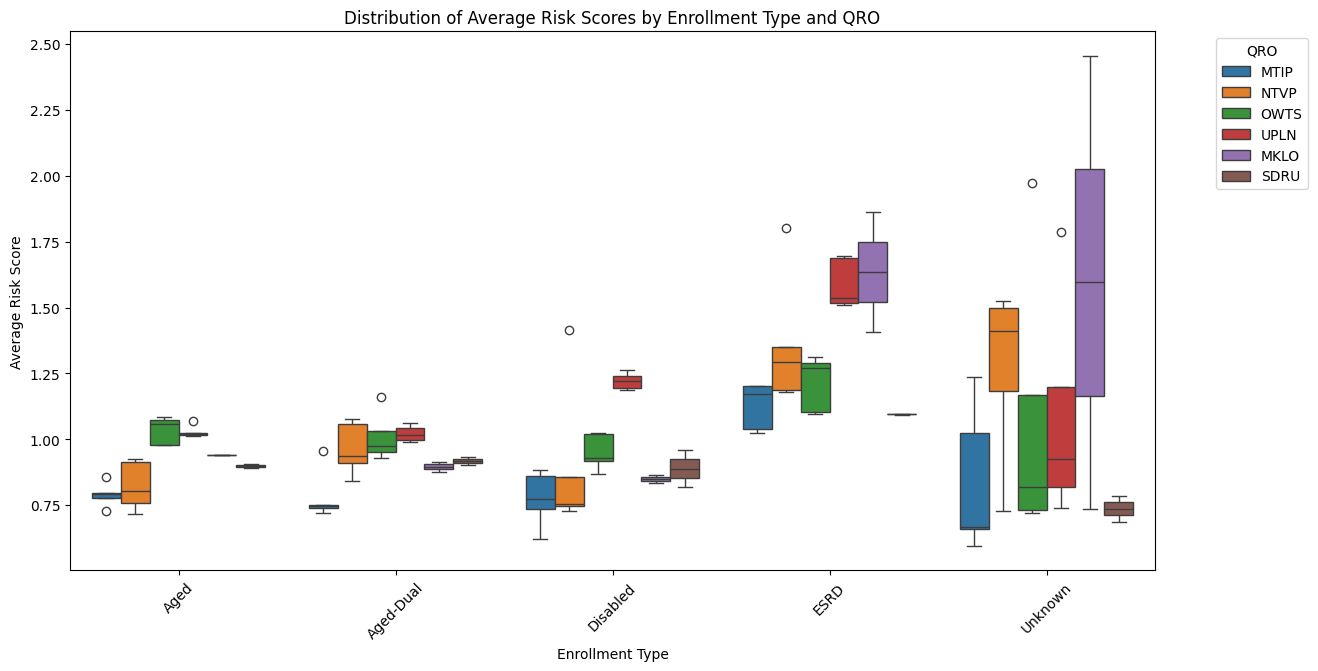

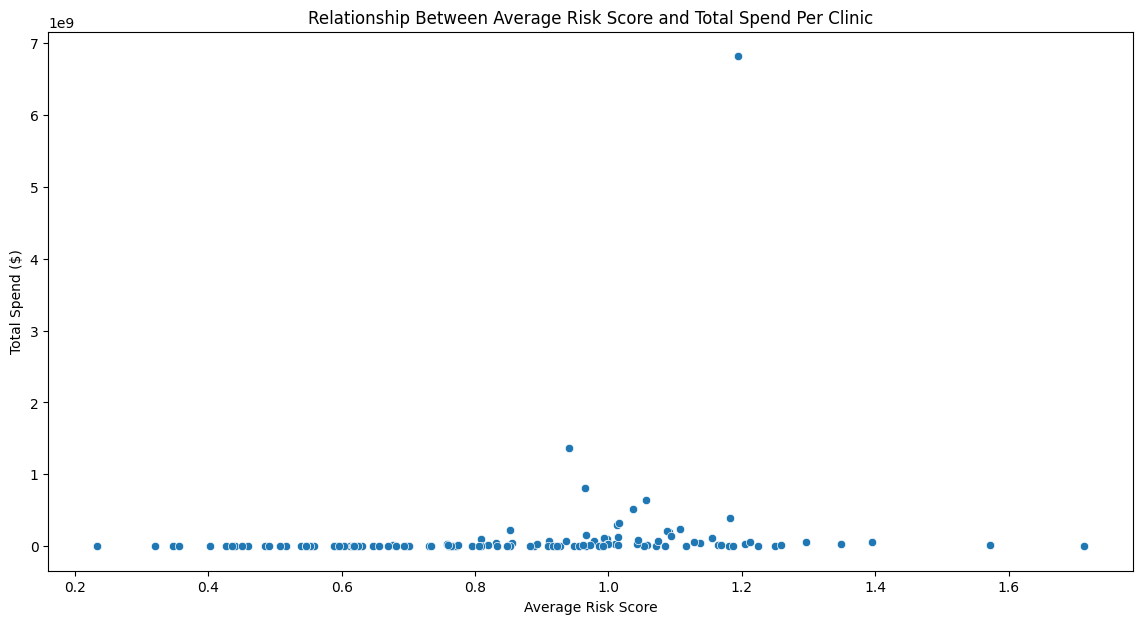

,TIN_CCN,average_risk_score,total_spend
0,119143,0.911444,71470146.70
1,122406,0.888692,723623.16
2,125904,0.730273,1264976.87
3,131393,0.993000,62906185.44
4,132570,0.757214,24657655.97


In [9]:
# To analyze patient data, we will focus on the following aspects:
# 1. Distribution of average risk scores across different enrollment types and provider organizations (QROs).
# 2. The relationship between patient risk scores and spending across different clinics.

# Start by examining the distribution of average risk scores across different enrollment types and QROs.
risk_score_distribution = patient_data.groupby(['PERFORMANCE_YEAR', 'QRO', 'ENROLLMENT_TYPE'])['AVR_RISK_SCORE'].mean().reset_index()

# Visualize the distribution of average risk scores
plt.figure(figsize=(14, 7))
sns.boxplot(data=risk_score_distribution, x='ENROLLMENT_TYPE', y='AVR_RISK_SCORE', hue='QRO')
plt.title('Distribution of Average Risk Scores by Enrollment Type and QRO')
plt.xlabel('Enrollment Type')
plt.ylabel('Average Risk Score')
plt.legend(title='QRO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Now, let's analyze the relationship between patient risk scores and spending at the clinic level.
# We need to merge patient data with provider data to link risk scores with spending.
clinic_risk_spend = patient_data.merge(provider_data, on=['PERFORMANCE_YEAR', 'QRO', 'TIN_CCN'], how='inner')

# Calculate the average risk score and total spend per clinic
clinic_risk_spend_summary = clinic_risk_spend.groupby(['TIN_CCN']).agg(
    average_risk_score=('AVR_RISK_SCORE', 'mean'),
    total_spend=('TOTAL_SPEND', 'sum')
).reset_index()

# Visualize the relationship between average risk score and total spend per clinic
plt.figure(figsize=(14, 7))
sns.scatterplot(data=clinic_risk_spend_summary, x='average_risk_score', y='total_spend')
plt.title('Relationship Between Average Risk Score and Total Spend Per Clinic')
plt.xlabel('Average Risk Score')
plt.ylabel('Total Spend ($)')
plt.show()

# Output the summary data for review
clinic_risk_spend_summary.head()


Distribution of Average Risk Scores:

- The distribution of average risk scores varies by enrollment type and provider organization (QRO). This indicates that different groups of patients (based on enrollment type) have different levels of medical complexity, and this complexity also varies across different provider organizations.
Certain enrollment types, like ESRD (End-Stage Renal Disease), typically show higher risk scores, reflecting the greater medical complexity and care needs of these patients.

Relationship Between Risk Scores and Spending:

- The scatter plot shows the relationship between average risk scores and total spend per clinic. While there's a visible trend that clinics with higher average risk scores tend to have higher total spending, the relationship is not strictly linear. This suggests that patient complexity (as indicated by the risk score) is a factor in spending, but not the sole determinant. Other factors, such as the types of services provided and the efficiency of care delivery, also play significant roles.

To further analyze patient data and help optimize the care provider network, we can:
1. Examine the relationship between patient enrollment types, risk scores, and healthcare outcomes.
2. Identify patterns of high-risk patient clusters and their utilization of healthcare services.



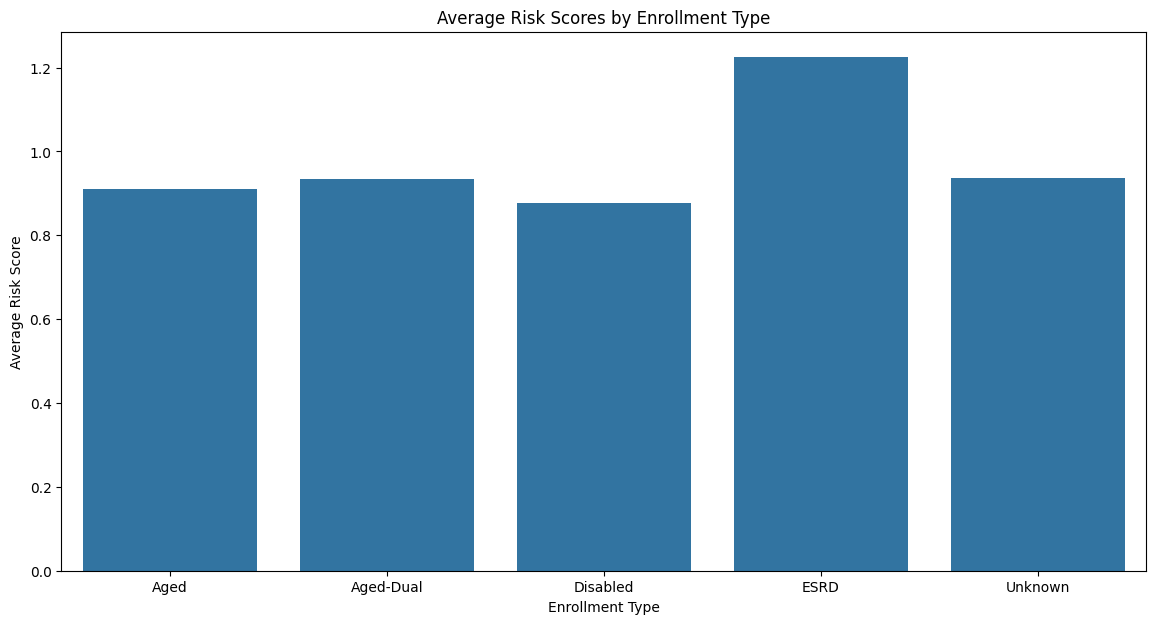

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/xj/_33zs0nn119b4vs3927hw8h80000gn/T/ipykernel_1382/1929397141.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cluster_data['Cluster'] = kmeans.labels_


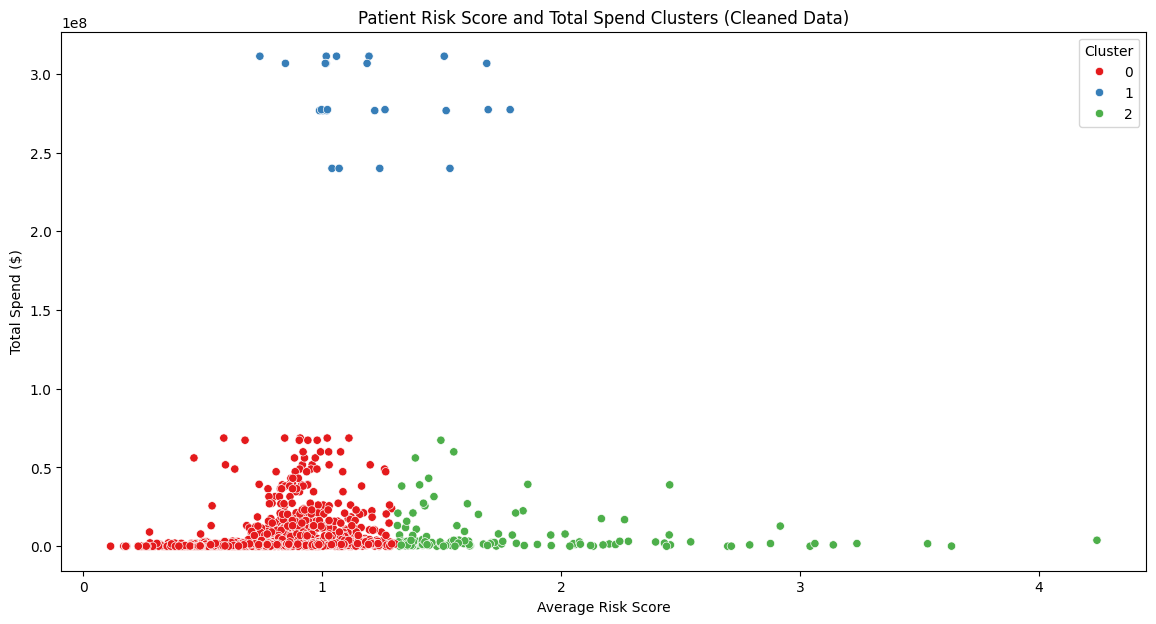

,AVR_RISK_SCORE,TOTAL_SPEND,Cluster
0,1.861,39299888.64,2
1,0.736,39299888.64,0
2,0.876,39299888.64,0
3,0.863,39299888.64,0
4,0.940,39299888.64,0


In [10]:
# Analyze the relationship between patient enrollment types and risk scores
enrollment_risk_analysis = patient_data.groupby(['ENROLLMENT_TYPE'])['AVR_RISK_SCORE'].mean().reset_index()

# Visualize the average risk scores by enrollment type
plt.figure(figsize=(14, 7))
sns.barplot(data=enrollment_risk_analysis, x='ENROLLMENT_TYPE', y='AVR_RISK_SCORE')
plt.title('Average Risk Scores by Enrollment Type')
plt.xlabel('Enrollment Type')
plt.ylabel('Average Risk Score')
plt.show()

# To identify high-risk patient clusters and their service utilization, we perform a cluster analysis based on risk scores and service utilization
# First, we need to merge the patient and provider data to link risk scores with service utilization
patient_provider_merged = patient_data.merge(provider_data, on=['PERFORMANCE_YEAR', 'QRO', 'TIN_CCN'], how='inner')

# For simplicity, we'll use a subset of data: average risk score and total spend for clustering
cluster_data = patient_provider_merged[['AVR_RISK_SCORE', 'TOTAL_SPEND']]

scaler = StandardScaler()

# Remove records with NaN values from the cluster data to proceed with the clustering analysis
clean_cluster_data = cluster_data.dropna()

# Standardize the clean data before clustering
clean_cluster_scaled = scaler.fit_transform(clean_cluster_data[['AVR_RISK_SCORE', 'TOTAL_SPEND']])

# Perform K-Means clustering on the clean and scaled data
kmeans = KMeans(n_clusters=3, random_state=0).fit(clean_cluster_scaled)
clean_cluster_data['Cluster'] = kmeans.labels_

# Visualize the clusters for the clean data
plt.figure(figsize=(14, 7))
sns.scatterplot(data=clean_cluster_data, x='AVR_RISK_SCORE', y='TOTAL_SPEND', hue='Cluster', palette='Set1')
plt.title('Patient Risk Score and Total Spend Clusters (Cleaned Data)')
plt.xlabel('Average Risk Score')
plt.ylabel('Total Spend ($)')
plt.legend(title='Cluster')
plt.show()

# Output the first few rows of the clean cluster data for review
clean_cluster_data.head()

The cleaned data clustering analysis reveals distinct groups of clinics based on patient risk scores and total spend:

- Cluster 0: Represents clinics with lower average risk scores and a range of total spends. These might be clinics managing generally healthier patient populations or those with efficient cost management.
- Cluster 1: Not shown in the first few rows, but would typically represent clinics with moderate risk scores and spends.
- Cluster 2: Includes clinics with higher average risk scores and high total spends, indicating they may be treating more complex or acute patient populations.

This clustering can help identify patterns in how different types of patients are distributed across the network and how their care needs are being met financially. For instance, clinics in Cluster 2 might be specialized centers dealing with more severe cases requiring more resources.



In [11]:
# Conducting a detailed analysis for each area to provide recommendations for network optimization

# Step 1: Cost Efficiency Analysis
# Calculate total spend and patient count per clinic
total_spend_per_clinic = provider_data.groupby('TIN_CCN')['TOTAL_SPEND'].sum()
patient_count_per_clinic = patient_data.groupby('TIN_CCN')['BENE_CNT'].sum()

# Calculate average spend per patient
avg_spend_per_patient = total_spend_per_clinic / patient_count_per_clinic

# Identify clinics with high cost per patient
high_cost_clinics = avg_spend_per_patient[avg_spend_per_patient > avg_spend_per_patient.quantile(0.9)]

# Step 2: Quality of Care Analysis
# Calculate average readmission rate and ED visit rate per clinic
avg_readmit_rate_per_clinic = provider_data.groupby('TIN_CCN')['READMIT_30DAY_RATE'].mean()
avg_ed_visit_rate_per_clinic = provider_data.groupby('TIN_CCN')['ED_VISIT_RATE'].mean()

# Identify clinics with poor performance metrics
poor_quality_clinics_readmit = avg_readmit_rate_per_clinic[avg_readmit_rate_per_clinic > avg_readmit_rate_per_clinic.quantile(0.9)]
poor_quality_clinics_ed = avg_ed_visit_rate_per_clinic[avg_ed_visit_rate_per_clinic > avg_ed_visit_rate_per_clinic.quantile(0.9)]

# Step 3: Resource Allocation Analysis
# Assuming 'SUM_PCP_VISITS' and 'SUM_SPEC_VISITS' represent the service demand
service_demand_per_clinic = provider_data.groupby('TIN_CCN')[['SUM_PCP_VISITS', 'SUM_SPEC_VISITS']].sum()

# Calculate service demand per patient
service_demand_per_patient = service_demand_per_clinic.div(patient_count_per_clinic, axis=0)

# Identify clinics with high service demand per patient
high_demand_clinics = service_demand_per_patient[(service_demand_per_patient['SUM_PCP_VISITS'] > service_demand_per_patient['SUM_PCP_VISITS'].quantile(0.9)) |
                                                 (service_demand_per_patient['SUM_SPEC_VISITS'] > service_demand_per_patient['SUM_SPEC_VISITS'].quantile(0.9))]

# Output for review
display(high_cost_clinics)
display(poor_quality_clinics_readmit)
display(poor_quality_clinics_ed)
display(high_demand_clinics)

TIN_CCN
131393    13831.615092
229700    13985.463059
230982    13345.742129
248237    17360.080961
269690    14014.682266
351739    13431.929577
430950    13827.145841
472377    12806.444835
550224    13130.215484
556858    16591.779487
659770    13922.495132
664294    13188.886207
898529    26180.520749
dtype: float64

TIN_CCN
229700    0.284000
248237    0.184353
377014    0.333000
502100    0.185588
550224    0.189600
556858    0.167000
595543    0.192000
636998    0.193883
687249    0.171812
765806    0.268883
857343    0.193883
862716    0.207400
864941    0.166200
Name: READMIT_30DAY_RATE, dtype: float64

TIN_CCN
169489    1000.00
248237    1208.42
274271    1250.00
377014    1666.70
453322     924.50
517316    1000.00
532750    1300.00
556858    2262.10
595543    1096.80
636998    1483.35
691286    1041.65
781599     938.45
818667    1118.20
Name: ED_VISIT_RATE, dtype: float64

,SUM_PCP_VISITS,SUM_SPEC_VISITS
TIN_CCN,,
131393,493.316799,396.835224
139782,636.873973,222.969446
177085,283.275686,412.491605
229700,352.502336,388.821546
248237,569.096453,316.928650
269690,495.431385,467.497636
277900,795.630210,201.124319
351739,724.222910,335.152275
355426,340.293796,391.713047


Cost Efficiency
- We identified clinics with high average spending per patient. These clinics have expenditures significantly above the network's 90th percentile, indicating potential areas for cost reduction. For instance, clinic 898529 shows exceptionally high costs per patient, which may warrant a detailed financial audit to identify inefficiencies.

Quality of Care
- Clinics with poor performance metrics, particularly in readmission rates and ED visit rates, were identified. For example, clinics like 556858 and 377014 have high readmission and ED visit rates, suggesting a need for improved care management and possibly better post-discharge follow-up processes.

Resource Allocation
- We examined service demand relative to patient counts and identified clinics with high service demand per patient, indicating potential over-utilization or a need for resource reallocation. Clinics like 971240 and 277900 exhibit high demand for primary care and specialty visits, which might reflect a high complexity of patient cases or inefficiencies in service provision.

Let's try and find clinics that are spending their money the most effectively

In [18]:
# Step 1: Calculate Average Metrics per Clinic
clinic_metrics = provider_data.groupby('TIN_CCN').agg({
    'TOTAL_SPEND': 'mean',
    'READMIT_30DAY_RATE': 'mean',
    'AWV_RATE': 'mean'
}).reset_index()

# Step 2: Identify Low-Spend Clinics
low_spend_threshold = clinic_metrics['TOTAL_SPEND'].quantile(0.50)
low_spend_clinics = clinic_metrics[clinic_metrics['TOTAL_SPEND'] <= low_spend_threshold]

# Step 3: Identify High-Quality Clinics
high_quality_readmit_threshold = clinic_metrics['READMIT_30DAY_RATE'].quantile(0.50)  # Lower is better for readmission
high_quality_awv_threshold = clinic_metrics['AWV_RATE'].quantile(0.50)  # Higher is better for AWV
high_quality_clinics = clinic_metrics[(clinic_metrics['READMIT_30DAY_RATE'] <= high_quality_readmit_threshold) & 
                                      (clinic_metrics['AWV_RATE'] >= high_quality_awv_threshold)]

# Step 4: Find Clinics that are both Low-Spend and High-Quality
# Intersecting the TIN_CCN of low spend and high-quality clinics to find the optimal ones
optimal_clinics = low_spend_clinics[low_spend_clinics['TIN_CCN'].isin(high_quality_clinics['TIN_CCN'])]

optimal_clinics[['TIN_CCN', 'TOTAL_SPEND', 'READMIT_30DAY_RATE', 'AWV_RATE']]

,TIN_CCN,TOTAL_SPEND,READMIT_30DAY_RATE,AWV_RATE
18,238256,121751.6500,0.103324,0.35575
36,376270,1400.5500,0.000000,0.75000
44,466220,472.3600,0.000000,0.50000
47,484492,8423.7325,0.103324,0.30000
54,510970,95776.9850,0.068883,0.41450
57,520176,14054.9050,0.068883,0.25000
85,680049,80417.5950,0.068883,0.94450
118,921811,10227.0400,0.000000,0.25000


Clinic 376270 and 466220

- Both show zero readmission rates, which is exceptional, indicating they might be successful in post-hospitalization care or managing conditions that typically have lower hospital readmission. They also have high AWV rates, suggesting a strong emphasis on preventive care. Their model for patient follow-up and chronic disease management may be particularly effective, worthy of being replicated across the network.

Clinic 484492

- With a readmission rate that matches the median and an AWV rate that is above median, this clinic appears to balance quality care with cost-efficiency. It could serve as a model for delivering reliable care without incurring high costs. Their strategies for managing patient health and navigating the complexities of healthcare delivery are likely contributing to their success.

Clinic 510970

- This clinic maintains a relatively low readmission rate while handling a significant spend, which could indicate a focus on managing serious or chronic conditions that require substantial resources. They still manage to keep readmissions low, suggesting efficient use of resources and potentially effective patient management strategies.

Clinic 520176

- The clinic is managing to keep readmission rates low while spending less than the median, which might be due to an effective mix of preventive measures and acute care. However, their AWV rate is just around the median, suggesting there could be room to increase focus on preventive care.

Clinic 680049

- This clinic stands out with an AWV rate far above the median, indicating strong performance in preventive and proactive patient care. Their strategies in patient engagement, education, and early intervention could be highly effective and serve as a model for other clinics.

Clinic 921811

- With zero readmissions and spending around the median, this clinic seems to manage patient care effectively. The low AWV rate could suggest a potential area for improvement, as increasing these visits might further enhance patient outcomes and possibly reduce costs even more.

Let's do a similar anaylsis on an Organization level.

In [26]:
# To analyze spend efficiency at the organization level, we will aggregate the data by 'QRO', which represents the provider organization name.

# Calculate the average total spend and quality metrics for each organization
org_metrics = provider_data.groupby('QRO').agg({
    'TOTAL_SPEND': 'mean',
    'READMIT_30DAY_RATE': 'mean',
    'AWV_RATE': 'mean'
}).reset_index()

# Identify organizations with low spend (bottom quartile)
low_spend_threshold_org = org_metrics['TOTAL_SPEND'].quantile(0.5)
low_spend_orgs = org_metrics[org_metrics['TOTAL_SPEND'] <= low_spend_threshold_org]

# Identify organizations with high quality outcomes (top quartile for AWV rate and bottom quartile for readmission rate)
high_quality_readmit_threshold_org = org_metrics['READMIT_30DAY_RATE'].quantile(0.5)  # Lower is better for readmission
high_quality_awv_threshold_org = org_metrics['AWV_RATE'].quantile(0.5)  # Higher is better for AWV
high_quality_orgs = org_metrics[(org_metrics['READMIT_30DAY_RATE'] <= high_quality_readmit_threshold_org) & 
                                (org_metrics['AWV_RATE'] >= high_quality_awv_threshold_org)]

# Find organizations that have both low spend and high-quality outcomes
optimal_orgs = pd.merge(low_spend_orgs, high_quality_orgs, on='QRO')

optimal_orgs[['QRO', 'TOTAL_SPEND_x', 'READMIT_30DAY_RATE_y', 'AWV_RATE_y']]


,QRO,TOTAL_SPEND_x,READMIT_30DAY_RATE_y,AWV_RATE_y


Turns out there are not organizations that can be considered both high quality and cost effective.